In [67]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [68]:
df = pd.read_csv('../files/df_merged.csv', index_col=0)

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [69]:
#Guardamos un nuevo df con las columnas ["Year", 'Month', 'Total Flights'] para trabajar sobre ellas
df_flights = df[["Year", 'Month', 'Total Flights']]

In [70]:
# Agrupamos por columnas 'Year' y 'Month' y sumamos el número total de vuelos

df_flights = df_flights.groupby(["Year", 'Month'], as_index=False).sum()

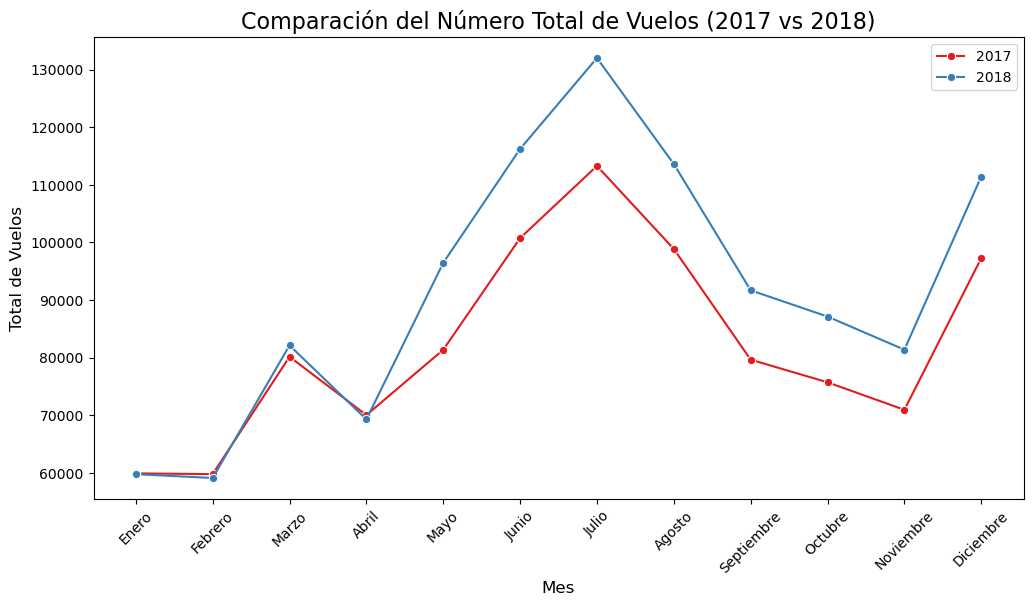

In [71]:
# Creamos el gráfico con Seaborn, diferenciando por año:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_flights, x="Month", y="Total Flights", hue="Year", marker="o", palette='Set1')

# Personalización
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
            'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.title('Comparación del Número Total de Vuelos (2017 vs 2018)', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Total de Vuelos', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=meses, rotation=45, fontsize=10)

plt.legend()
plt.show()

2018 parece haber tenido un mayor número de vuelos reservados en verano (junio, julio y agosto), destacando en el pico de junio, mientras que 2017 mantuvo una distribución más equilibrada a lo largo del año. La caída en vuelos en los últimos meses de ambos años podría estar relacionada con la temporada baja, donde hay menos demanda.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

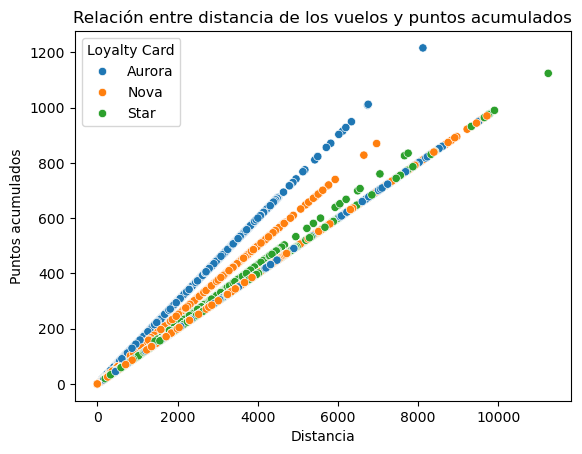

In [72]:
# creamos una gráfica básica usando 'sns.scatterplot()' y diferenciando entre los distintos programas de fidelización
sns.scatterplot(x = "Distance", 
                y = "Points Accumulated", 
                data = df,
                hue= "Loyalty Card")

# cambiamos los nombres de los ejes
plt.xlabel("Distancia")
plt.ylabel("Puntos acumulados")
plt.title('Relación entre distancia de los vuelos y puntos acumulados');

Hay una relación positiva: a mayor distancia, mayor número de puntos acumulados, esto sugiere que los puntos acumulados están probablemente determinados por la distancia recorrida, quizás como parte del sistema de fidelidad para los usuarios.

Las líneas formadas por los puntos de cada color indican que cada programa tiene una tasa diferente de acumulación de puntos.
- Aurora (Azul): Acumula puntos más rápidamente (mayor pendiente).
- Nova (Naranja): Tasa de acumulación intermedia.
- Star (Verde): Acumula puntos más lentamente (menor pendiente).

Es posible que el programa de fidelidad ofrezca un valor base uniforme (independiente del programa) para un número de viajes hasta alcanzar un mínimo, quizás para incentivar la participación de nuevos usuarios.

In [73]:
#Calculamos el coeficiente de correlación de Pearson:

df['Distance'].corr(df['Points Accumulated'])

0.9945685367816886

Como el valor es muy cercano a 1, quiere decir que hay una fuerte correlación positiva, es decir, que ambos valores aumentan en proporción constante.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [74]:
#Agrupamos los datos por provincia, realizando un conteo de los clientes que hay en cada una de ellas
df_province = df.groupby("Province")["Loyalty Number"].count().reset_index()

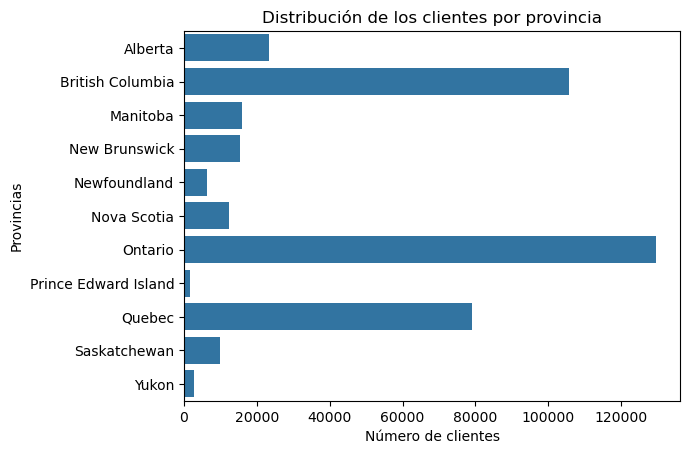

In [75]:
sns.barplot(x = "Loyalty Number", y="Province", data=df_province, errorbar=None);
plt.xlabel("Número de clientes")
plt.ylabel("Provincias")
plt.title('Distribución de los clientes por provincia');

Hay tres provincias que destacan sobre las demás: Ontario, British Columbia y Quebec, en ese orden.

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [76]:
#Calculamos la media salarial por cada nivel educativo y ordenamos de manera descendente
df_educ = (df.groupby("Education")["Salary"].mean().reset_index()).sort_values(by='Salary', ascending=False)

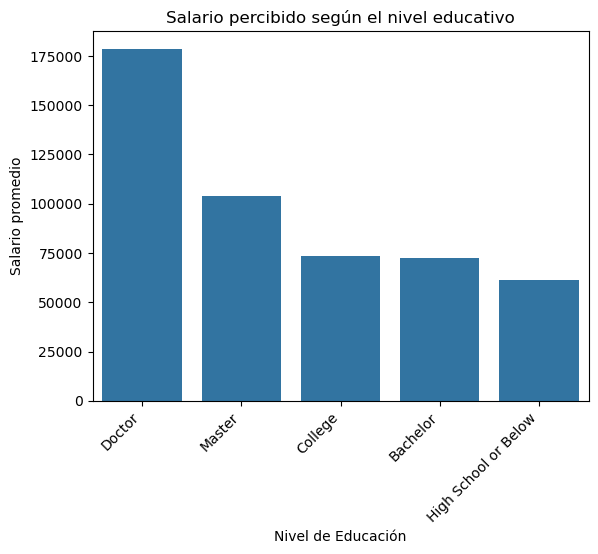

In [77]:
sns.barplot(x = "Education", y="Salary", data=df_educ, errorbar=None);
plt.xlabel("Nivel de Educación")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45, ha='right')  # 45 grados y alineadas a la derecha
plt.title('Salario percibido según el nivel educativo');

A mayor nivel educativo, mayor salario perciben los clientes.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [78]:
#Realizamos un conteo de los clientes por cada tarjeta de fidelización existente
df_cards = df.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()

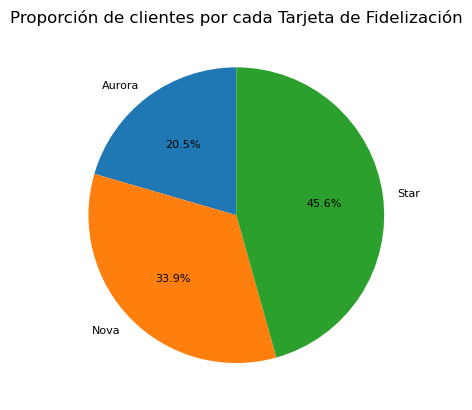

In [79]:
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_cards, 
        autopct=  '%1.1f%%',  
        textprops={'fontsize': 8}, 
        startangle=90)

plt.title('Proporción de clientes por cada Tarjeta de Fidelización');

La proporción de clientes según los distintos programas de fidelización es inversamente proporcional a los beneficios que los programas ofrecen, esto es:

Suponemos que 'Aurora' es el programa de fidelización que mayor beneficios ofrece, es sin embargo el que cuenta con menos clientes.

En contraposición, el programa 'Star' es el que posee mayor número de clientes, pero el que menos beneficios proporciona a estos.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

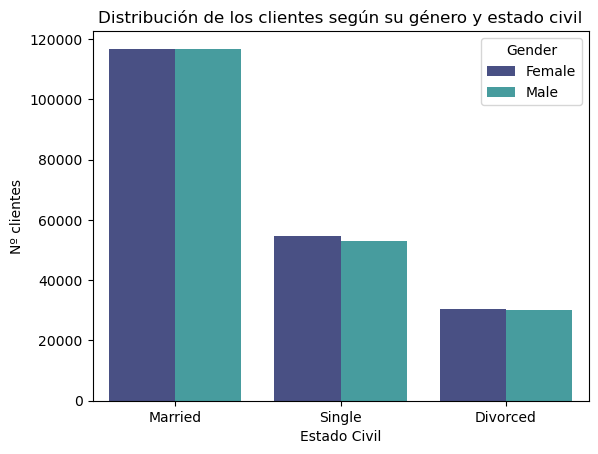

In [103]:
sns.countplot(x = "Marital Status", 
              data = df, 
              palette = "mako", 
              hue = "Gender")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Estado Civil")
plt.ylabel("Nº clientes")
plt.title('Distribución de los clientes según su género y estado civil'); 

Podemos afirmar que la diferencia entre hombres y mujeres según su estado civil es prácticamente insignificativa. Por otro lado, destaca un gran número de personas casadas frente a las solteras y divorciadas.